# Previous analysis

- Disease defined at dataset level but each dataset contains multiple diseases and healthy samples

- Dataset integration is not recommended. Different datasets adopt different ranges for miRNA values

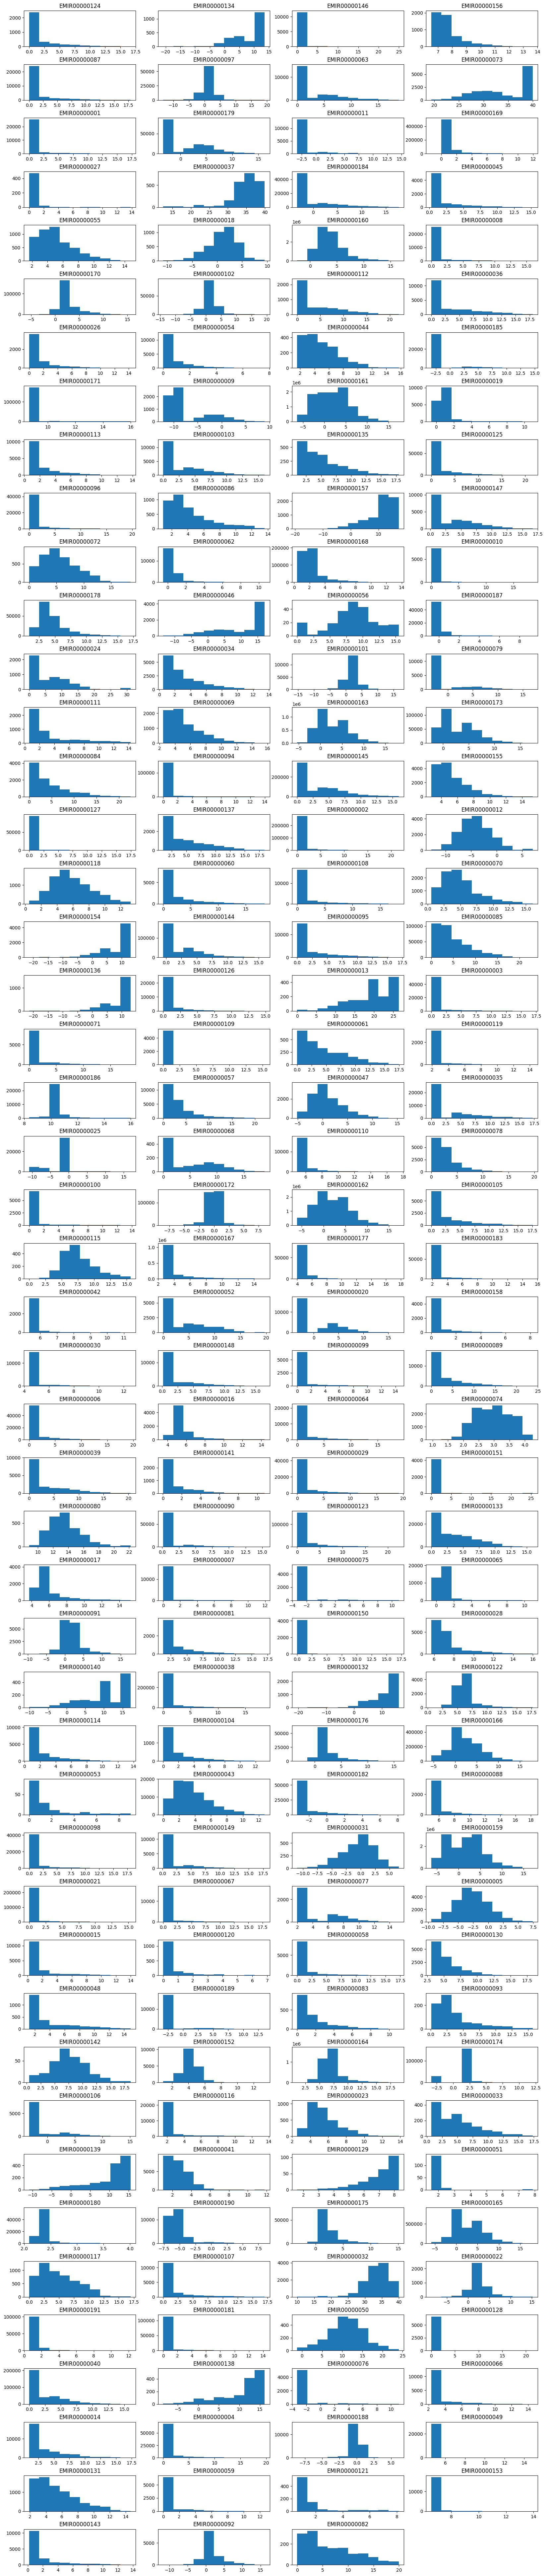

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(48, 4, figsize=(20, 100), gridspec_kw={'hspace': 0.5})
for i, filename in enumerate(glob.glob('data/raw/exp/*.csv')):
    values = pd.read_csv(filename, index_col=0).values.flatten()
    axs[i//4, i%4].hist(values)
    axs[i//4, i%4].set_title(filename.split('/')[-1][:-8])

axs[-1, -1].set_visible(False)

plt.show()

# Dataset Selection

### [OpenRefine](https://openrefine.org)

- Retrieve platform technology from [Gene Expression Omnibus](https://0-www-ncbi-nlm-nih-gov.brum.beds.ac.uk/geo/browse/?view=platforms)

| Technology                 | Datasets  | Samples      |
| :------------------------- | --------: | -----------: |
| high-throughput sequencing | 64        | 1.473        |
| spotted oligonucleotide    | 35        | 24.119       |
| in situ oligonucleotide    | 61        | 2.987        |
| RT-PCR                     | 28        | 544          |
| other                      | 3         | 75           |
| ***Total***                | ***191*** | ***29.198*** |

- Delete anomalous datasets

| Dataset      | Reason                          |
| :----------- | :------------------------------ |
| EMIR00000005 | RT-PCR technology               |
| EMIR00000012 | RT-PCR technology               |
| EMIR00000013 | RT-PCR technology               |
| EMIR00000018 | RT-PCR technology               |
| EMIR00000024 | RT-PCR technology               |
| EMIR00000027 | RT-PCR technology               |
| EMIR00000031 | RT-PCR technology               |
| EMIR00000032 | RT-PCR technology               |
| EMIR00000037 | RT-PCR technology               |
| EMIR00000046 | RT-PCR technology               |
| EMIR00000050 | RT-PCR technology               |
| EMIR00000073 | RT-PCR technology               |
| EMIR00000083 | RT-PCR technology               |
| EMIR00000109 | RT-PCR technology               |
| EMIR00000120 | RT-PCR technology               |
| EMIR00000128 | RT-PCR technology               |
| EMIR00000132 | RT-PCR technology               |
| EMIR00000134 | RT-PCR technology               |
| EMIR00000136 | RT-PCR technology               |
| EMIR00000138 | RT-PCR technology               |
| EMIR00000139 | RT-PCR technology               |
| EMIR00000140 | RT-PCR technology               |
| EMIR00000141 | RT-PCR technology               |
| EMIR00000146 | RT-PCR technology               |
| EMIR00000150 | RT-PCR technology               |
| EMIR00000151 | RT-PCR technology               |
| EMIR00000154 | RT-PCR technology               |
| EMIR00000157 | RT-PCR technology               |
| EMIR00000030 | Other technology                |
| EMIR00000041 | Other technology                |
| EMIR00000152 | Other technology                |
| EMIR00000180 | Inconsistency with EMIR00000177 |
| EMIR00000091 | Subsets of EMIR00000102         |
| EMIR00000092 | Subsets of EMIR00000102         |
| EMIR00000097 | Subsets of EMIR00000102         |
| EMIR00000101 | Subsets of EMIR00000102         |
| EMIR00000010 | Not related to diseases         |
| EMIR00000011 | Not related to diseases         |
| EMIR00000023 | Not related to diseases         |
| EMIR00000026 | Not related to diseases         |
| EMIR00000028 | Not related to diseases         |
| EMIR00000038 | Not related to diseases         |
| EMIR00000081 | Not related to diseases         |
| EMIR00000095 | Not related to diseases         |
| EMIR00000096 | Not related to diseases         |
| EMIR00000123 | Not related to diseases         |
| EMIR00000133 | Not related to diseases         |
| EMIR00000137 | Not related to diseases         |
| EMIR00000158 | Not related to diseases         |

# Metadata Preprocessing

### [OpenRefine](https://openrefine.org)

- Concatenate metadata files into a single table

- Delete anomalous samples

| Reason                                  | Number  |
| :-------------------------------------- | ------: |
| Organism ≠ homo sapiens                 | 22      |
| Channel count ≠ 1                       | 189     |
| Molecule ≠ total RNA                    | 2       |
| Disease status not clear (EMIR00000090) | 13      |
| Disease status not clear (EMIR00000008) | 4       |
| Disease status not clear (EMIR00000067) | 3       |
| Disease status not clear (EMIR00000102) | 30      |
| Disease status not clear (EMIR00000166) | 9       |
| Disease status not clear (EMIR00000168) | 9       |

- Split and transpose *key:value* features

- Merge equivalent features associated to different datasets

- Rename features consistently

- Delete irrelevant or redundant features (e.g. *state* has an almost 1:1 relationship with *city*)

- Delete features where missing values ⪆ 98%

- Add dataset-level features

- Refine dataset-level features (based on majority class) using sample-level data
        
- Detect healthy samples in each dataset

- Standardize *age*, *sex*, *city* and *disease*

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


metadata = pd.read_csv('data/PD.csv', index_col=0)

# Delete samples whose disease occurs less than 5 times in a dataset
metadata = metadata[metadata.groupby(['dataset', 'disease']).disease.transform('size') >= 5]

# Delete datasets with a unique disease value
to_remove = [index for index, value in (metadata.groupby('dataset').disease.nunique() == 1).items() if value]
metadata = metadata[~metadata.dataset.isin(to_remove)]

# Split samples into training and test set, stratifying by 'dataset' and 'disease' columns
train_index, test_index = train_test_split(metadata.index, test_size=0.2, random_state=42, stratify=metadata[['dataset', 'disease']])
metadata.loc[train_index, 'test'] = False
metadata.loc[test_index, 'test'] = True

metadata = metadata.sort_index()
metadata.to_csv('data/PD.csv')
metadata

,dataset,technology,country,city,sample_type,sex,age,disease,disease_type,body_site,stage,test
sample_id,,,,,,,,,,,,
GSM1081746,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,63.0,Breast cancer,Cancer,Breast,NaN,False
GSM1081747,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,46.0,Healthy control,NaN,NaN,NaN,False
GSM1081748,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,44.0,Breast cancer,Cancer,Breast,NaN,False
GSM1081749,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,65.0,Healthy control,NaN,NaN,NaN,False
GSM1081750,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,59.0,Healthy control,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
GSM989224,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,55.0,Colorectal cancer,Cancer,Intestine,IIIB (tnm),False
GSM989225,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,64.0,Colorectal cancer,Cancer,Intestine,IIIB (tnm),False
GSM989226,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,51.0,Colorectal cancer,Cancer,Intestine,IV (tnm),False


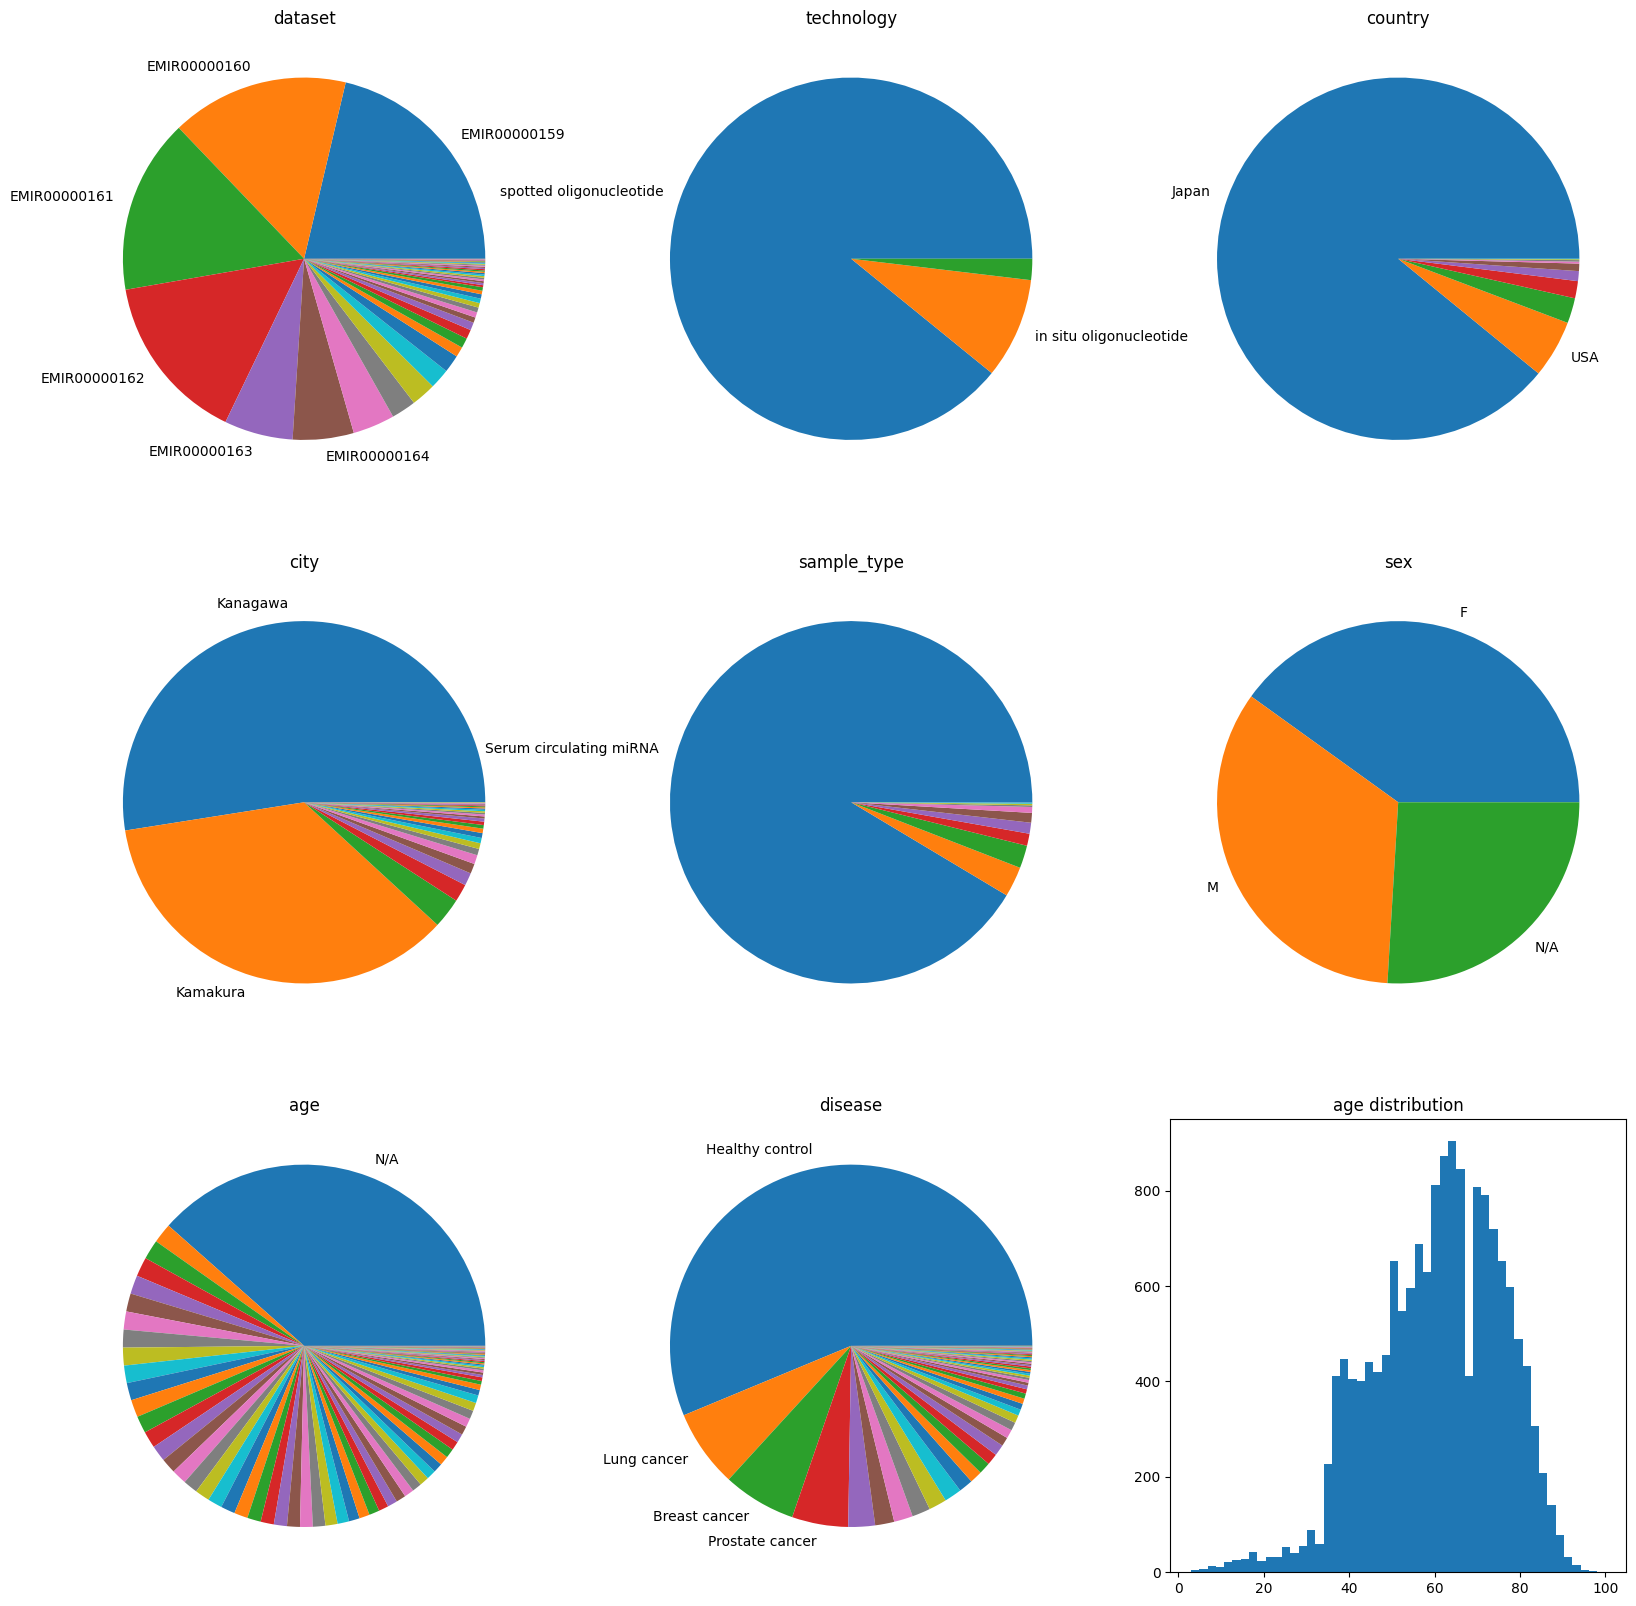

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


metadata = pd.read_csv('data/PD.csv', index_col=0).iloc[:,:-4]

# Visualize feature distribution
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i, column in enumerate(metadata.columns):
    counts = metadata[column].value_counts(dropna=False)
    labels = [label if count > 1000 else '' for count, label in zip(counts, counts.index)]
    labels = ['N/A' if pd.isnull(label) else label for label in labels]
    axs[i//3, i%3].set_title(f'{column}')
    axs[i//3, i%3].pie(counts, labels=labels)

axs[-1, -1].set_title('age distribution')
axs[-1, -1].hist(metadata.age, bins=50)
plt.show()

# miRNA Preprocessing

### [miRBaseConverter](https://taoshengxu.shinyapps.io/mirbaseconverter/)

- Convert miRNA names to miRBase latest version

- Retrieve miRNA sequence

In [4]:
import pandas as pd


mirna = pd.read_csv('data/miRNA.tsv', sep='\t')
name_converter = dict(zip(mirna.OriginalName, mirna.miRNAName_v22))

def convert_miRNA_name(name):
    name = name.strip()
    name = name.split('_v1')[0]
    name = name.split('_v2')[0]
    return name_converter[name]

values = []
datasets = pd.read_csv('data/PD.csv').groupby('dataset').sample_id.agg(list).to_dict()
for dataset, samples in datasets.items():

    # Strip, remove version suffix and update miRNA names
    df = pd.read_csv(f'data/raw/exp/{dataset}_exp.csv', converters={0: convert_miRNA_name})

    # Delete unknown miRNA
    df.dropna(subset=df.columns[0], inplace=True)

    # Delete repeated miRNA (anomaly)
    df.drop_duplicates(df.columns[0], inplace=True)

    # Transpose data
    df = df.set_index(df.columns[0]).T.rename_axis('sample_id')

    # Delete samples not included in metadata
    df = df.loc[samples]
    values.append(df)

# Concatenate data into a single dataframe
values = pd.concat(values)

values = values.sort_index()
values.to_csv('data/EXP.csv')
values

Unnamed: 0,hsa-miR-486-5p,hsa-miR-122-5p,hsa-miR-423-5p,hsa-miR-451a,hsa-miR-92a-3p,hsa-let-7b-5p,hsa-miR-10b-5p,hsa-miR-320a-3p,hsa-miR-10a-5p,hsa-miR-99a-5p,...,hsa-miR-135a-2-3p,hsa-miR-137-5p,hsa-miR-147b-5p,hsa-miR-190b-3p,hsa-miR-1912-5p,hsa-miR-196a-1-3p,hsa-miR-217-3p,hsa-miR-320a-5p,hsa-miR-375-5p,hsa-miR-519a-2-5p
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM1081746,9.842000,5.740000,5.353000,8.016000,8.976000,8.951,1.692000,8.147000,1.920000,1.661000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081747,9.722000,5.899000,4.476000,9.125000,9.184000,9.527,2.667000,7.005000,1.938000,2.192000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081748,8.466000,2.251000,3.964000,8.583000,7.229000,8.788,2.683000,7.042000,2.152000,2.518000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081749,3.725000,1.160000,1.191000,6.584000,2.629000,2.062,2.846000,2.292000,2.531000,2.205000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081750,9.960000,2.170000,3.698000,8.743000,8.927000,8.476,2.306000,7.787000,2.123000,2.136000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM989224,1.286828,3.055074,-1.108253,6.686869,3.133780,NaN,2.926098,2.566769,1.178645,1.815485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM989225,1.531735,2.124445,0.828513,6.165665,2.046011,NaN,1.184656,5.003374,1.570707,0.241790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM989226,10.537140,1.892556,2.907918,4.585476,0.199452,NaN,0.775037,4.468402,1.110949,1.030714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graph Construction

### [RNABERT](https://github.com/mana438/RNABERT)

In [73]:
import pandas as pd
import torch
from collections import OrderedDict
from RNABERT.bert import get_config, BertModel, BertForMaskedLM


config = get_config('RNABERT/RNA_bert_config.json')
config.hidden_size = config.num_attention_heads * config.multiple

model = BertModel(config)
model = BertForMaskedLM(config, model).eval()

state_dict = torch.load('RNABERT/bert_mul_2.pth', map_location='cpu')
model.load_state_dict(OrderedDict((key[7:], value) for key, value in state_dict.items()))

mirna = pd.read_csv('data/miRNA.tsv', sep='\t').dropna()
mirna = dict(zip(mirna.miRNAName_v22, mirna.miRNASequence_v22))

# Compute embeddings for miRNA sequences
mapping = {'A': 2, 'U': 3, 'G': 4, 'C': 5}
for name, sequence in mirna.items():
    input = [mapping[c] for c in sequence] + [0] * (config.max_position_embeddings - len(sequence))
    encoded_layers = model(torch.tensor([input]))[-1]
    mirna[name] = torch.mean(encoded_layers[0], dim=0).detach().numpy()

torch.save(mirna, 'artifacts/miRNA.pt')

### [PyTorch Geometric](https://pyg.org)

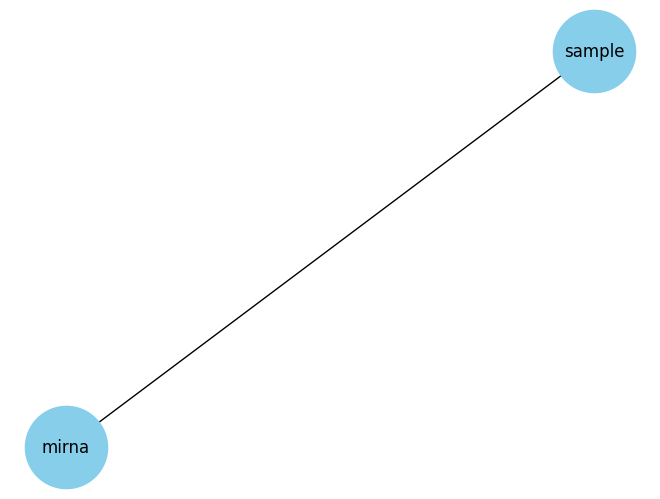


Node number
sample                             : 25957
mirna                              : 2588

Edge number
('sample', 'to', 'mirna')          : 61230421
('mirna', 'rev_to', 'sample')      : 61230421

Node features
sample                             : 104
mirna                              : 120

Edge features
('sample', 'to', 'mirna')          : 1
('mirna', 'rev_to', 'sample')      : 1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from sklearn.preprocessing import minmax_scale
from torch_geometric.data import HeteroData
from torch_geometric.transforms import ToUndirected


data = HeteroData()
metadata = pd.read_csv('data/PD.csv', index_col=0).reset_index(drop=True)
values = pd.read_csv('data/EXP.csv', index_col=0).reset_index(drop=True)

# Set features for 'sample' nodes
xs = torch.tensor(pd.get_dummies(metadata[['dataset', 'technology', 'country', 'city', 'sample_type', 'sex']]).values, dtype=torch.float)
age = torch.tensor(np.nan_to_num(minmax_scale(metadata.age), nan=-1), dtype=torch.float).unsqueeze(1)
data['sample'].x = torch.cat((xs, age), dim=1)

# Set class labels for 'sample' nodes
data['sample'].y = torch.tensor(metadata.disease.factorize()[0])

# Set train and test masks for 'sample' nodes
data['sample'].train_mask = torch.tensor(~metadata.test)
data['sample'].test_mask = torch.tensor(metadata.test)

# Set features for 'mirna' nodes
embeddings = torch.load('artifacts/miRNA.pt')
data['mirna'].x = torch.tensor(np.array([embeddings[name] for name in values.columns]))

# Set edges
rows, cols = np.where(~np.isnan(values))
data['sample', 'mirna'].edge_index = torch.tensor(np.array([rows, cols]))

# Set edge features
data['sample', 'mirna'].edge_attr = torch.tensor(values.values[rows, cols], dtype=torch.float)

# Create undirected graph by adding reverse edges
data = ToUndirected()(data)

# Check that edge_index hold indices in the range [0, num_nodes-1]
data.validate(raise_on_error=True)

# Visualize graph schema
schema = nx.Graph()
schema.add_nodes_from(data.node_types)
schema.add_edges_from((e[0], e[2]) for e in data.edge_types)
nx.draw_kamada_kawai(schema, with_labels=True, node_color='skyblue', node_size=3500)
plt.show()

# Print graph properties
print(f'\033[1m\nNode number\033[0m')
for ntype in data.node_types:
   print(f'{ntype:<35}:', data[ntype].num_nodes)

print(f'\033[1m\nEdge number\033[0m')
for etype in data.edge_types:
   print(f'{str(etype):<35}:', data[etype].num_edges)

print(f'\033[1m\nNode features\033[0m')
for ntype in data.node_types:
   print(f'{ntype:<35}:', data[ntype].num_node_features)

print(f'\033[1m\nEdge features\033[0m')
for etype in data.edge_types:
   print(f'{str(etype):<35}:', data[etype].num_edge_features)

torch.save(data, 'artifacts/Graph.pt')

# Heterogenous Graph Neural Network

In [2]:
import torch
from torch_geometric.nn import GAT, to_hetero


data = torch.load('artifacts/Graph.pt')
test_data = data.subgraph({'sample': data['sample'].test_mask})

# Initialize GNN
model = GAT(
    in_channels=(-1, -1),
    hidden_channels=64,
    num_layers=2,
    out_channels=len(data['sample'].y.unique()),
    v2=True,
    jk='cat',
    edge_dim=1,
    add_self_loops=False
)

# Convert homogenous GNN to heterogenous GNN
model = to_hetero(model, data.metadata())

# Replace forward method to return only 'sample' node predictions
forward = model.forward
model.forward = lambda *args, **kwargs: forward(*args, **kwargs)['sample']

## Training

In [4]:
import tqdm
from torch_geometric import seed_everything, compile
from torch_geometric.loader import NeighborLoader
from torch.nn.functional import cross_entropy
from sklearn.metrics import accuracy_score


seed_everything(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_data.to(device)
compile(model)
model.to(device)

# Define loader for mini-batch training
train_loader = NeighborLoader(
    data,
    input_nodes=('sample', data['sample'].train_mask),
    num_neighbors=[-1],
    subgraph_type='induced',
    batch_size=256,
    shuffle=True
)

# Perform mini-batch training with early stopping
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
best_accuracy = -1
best_epoch = -1
patience = 20
for epoch in range(1, 1000):

    model.train()
    total_loss = 0
    for batch in tqdm.tqdm(train_loader):
        batch = batch.to(device)
        optimizer.zero_grad()                                                               # Clear gradients
        out = model(batch.x_dict, batch.edge_index_dict, edge_attr=batch.edge_attr_dict)    # Perform a forward pass
        loss = cross_entropy(out, batch['sample'].y)                                        # Compute loss
        loss.backward()                                                                     # Derive gradients
        optimizer.step()                                                                    # Update parameters based on gradients
        total_loss += float(loss) * batch['sample'].batch_size
    total_loss /= int(data['sample'].train_mask.sum())

    # Evaluate model on test data
    with torch.no_grad():
        model.eval()
        out = model(test_data.x_dict, test_data.edge_index_dict, edge_attr=test_data.edge_attr_dict)
        accuracy = accuracy_score(test_data['sample'].y, out.argmax(dim=1))
    print(f'Epoch: {epoch:03d}, Loss: {total_loss:.4f}, Test Accuracy: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_epoch = epoch
        torch.save({
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'epoch': epoch,
            'loss': total_loss,
            'accuracy': accuracy
            }, 'artifacts/GAT.pt')
    elif epoch - best_epoch > patience:
        print(f'Early stopping at epoch {epoch}')
        break

100%|██████████| 82/82 [05:30<00:00,  4.04s/it]


Epoch: 001, Loss: 2.6882, Test Accuracy: 0.5626


100%|██████████| 82/82 [05:22<00:00,  3.94s/it]


Epoch: 002, Loss: 1.9190, Test Accuracy: 0.5626


100%|██████████| 82/82 [05:11<00:00,  3.80s/it]


Epoch: 003, Loss: 1.6148, Test Accuracy: 0.6414


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 004, Loss: 1.2843, Test Accuracy: 0.6722


100%|██████████| 82/82 [05:11<00:00,  3.80s/it]


Epoch: 005, Loss: 1.1831, Test Accuracy: 0.6651


100%|██████████| 82/82 [05:13<00:00,  3.82s/it]


Epoch: 006, Loss: 1.1007, Test Accuracy: 0.7061


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 007, Loss: 1.0435, Test Accuracy: 0.7059


100%|██████████| 82/82 [05:13<00:00,  3.83s/it]


Epoch: 008, Loss: 0.9978, Test Accuracy: 0.7109


100%|██████████| 82/82 [05:28<00:00,  4.01s/it]


Epoch: 009, Loss: 0.9567, Test Accuracy: 0.7213


100%|██████████| 82/82 [05:26<00:00,  3.98s/it]


Epoch: 010, Loss: 0.9127, Test Accuracy: 0.7242


100%|██████████| 82/82 [05:14<00:00,  3.84s/it]


Epoch: 011, Loss: 0.8795, Test Accuracy: 0.7440


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 012, Loss: 0.8450, Test Accuracy: 0.7423


100%|██████████| 82/82 [05:06<00:00,  3.74s/it]


Epoch: 013, Loss: 0.8159, Test Accuracy: 0.7552


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 014, Loss: 0.7910, Test Accuracy: 0.7669


100%|██████████| 82/82 [05:06<00:00,  3.74s/it]


Epoch: 015, Loss: 0.7624, Test Accuracy: 0.7668


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 016, Loss: 0.7392, Test Accuracy: 0.7598


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 017, Loss: 0.7241, Test Accuracy: 0.7783


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 018, Loss: 0.6970, Test Accuracy: 0.7775


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 019, Loss: 0.6757, Test Accuracy: 0.8014


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 020, Loss: 0.6689, Test Accuracy: 0.7960


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 021, Loss: 0.6476, Test Accuracy: 0.7937


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 022, Loss: 0.6409, Test Accuracy: 0.7910


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 023, Loss: 0.6150, Test Accuracy: 0.8028


100%|██████████| 82/82 [05:07<00:00,  3.76s/it]


Epoch: 024, Loss: 0.6086, Test Accuracy: 0.8087


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 025, Loss: 0.5938, Test Accuracy: 0.8043


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 026, Loss: 0.5922, Test Accuracy: 0.8147


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 027, Loss: 0.5796, Test Accuracy: 0.8082


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 028, Loss: 0.5716, Test Accuracy: 0.8066


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 029, Loss: 0.5630, Test Accuracy: 0.8057


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 030, Loss: 0.5548, Test Accuracy: 0.8141


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 031, Loss: 0.5510, Test Accuracy: 0.8005


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 032, Loss: 0.5496, Test Accuracy: 0.8116


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 033, Loss: 0.5385, Test Accuracy: 0.8174


100%|██████████| 82/82 [05:07<00:00,  3.74s/it]


Epoch: 034, Loss: 0.5442, Test Accuracy: 0.8186


100%|██████████| 82/82 [05:06<00:00,  3.74s/it]


Epoch: 035, Loss: 0.5278, Test Accuracy: 0.8157


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 036, Loss: 0.5290, Test Accuracy: 0.8182


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 037, Loss: 0.5265, Test Accuracy: 0.8118


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 038, Loss: 0.5283, Test Accuracy: 0.8203


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 039, Loss: 0.5202, Test Accuracy: 0.8209


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 040, Loss: 0.5179, Test Accuracy: 0.8201


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 041, Loss: 0.5113, Test Accuracy: 0.8199


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 042, Loss: 0.5081, Test Accuracy: 0.8188


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 043, Loss: 0.5066, Test Accuracy: 0.8197


100%|██████████| 82/82 [05:08<00:00,  3.77s/it]


Epoch: 044, Loss: 0.5116, Test Accuracy: 0.8261


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 045, Loss: 0.5003, Test Accuracy: 0.8268


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 046, Loss: 0.5064, Test Accuracy: 0.8213


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 047, Loss: 0.4955, Test Accuracy: 0.8280


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 048, Loss: 0.4921, Test Accuracy: 0.8288


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 049, Loss: 0.4988, Test Accuracy: 0.8243


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 050, Loss: 0.4870, Test Accuracy: 0.8295


100%|██████████| 82/82 [05:06<00:00,  3.74s/it]


Epoch: 051, Loss: 0.4885, Test Accuracy: 0.8324


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 052, Loss: 0.4875, Test Accuracy: 0.8224


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 053, Loss: 0.4852, Test Accuracy: 0.8263


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 054, Loss: 0.4805, Test Accuracy: 0.8124


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 055, Loss: 0.4883, Test Accuracy: 0.8234


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 056, Loss: 0.4818, Test Accuracy: 0.8320


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 057, Loss: 0.4751, Test Accuracy: 0.8234


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 058, Loss: 0.4763, Test Accuracy: 0.8280


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 059, Loss: 0.4714, Test Accuracy: 0.8338


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 060, Loss: 0.4664, Test Accuracy: 0.8216


100%|██████████| 82/82 [05:06<00:00,  3.74s/it]


Epoch: 061, Loss: 0.4671, Test Accuracy: 0.8282


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 062, Loss: 0.4637, Test Accuracy: 0.8338


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 063, Loss: 0.4626, Test Accuracy: 0.8340


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 064, Loss: 0.4609, Test Accuracy: 0.8371


100%|██████████| 82/82 [05:07<00:00,  3.76s/it]


Epoch: 065, Loss: 0.4648, Test Accuracy: 0.8234


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 066, Loss: 0.4591, Test Accuracy: 0.8294


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 067, Loss: 0.4543, Test Accuracy: 0.8278


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 068, Loss: 0.4565, Test Accuracy: 0.8357


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 069, Loss: 0.4498, Test Accuracy: 0.8326


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 070, Loss: 0.4511, Test Accuracy: 0.8344


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 071, Loss: 0.4482, Test Accuracy: 0.8365


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 072, Loss: 0.4432, Test Accuracy: 0.8353


100%|██████████| 82/82 [05:07<00:00,  3.76s/it]


Epoch: 073, Loss: 0.4433, Test Accuracy: 0.8467


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 074, Loss: 0.4373, Test Accuracy: 0.8386


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 075, Loss: 0.4425, Test Accuracy: 0.8361


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 076, Loss: 0.4384, Test Accuracy: 0.8388


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 077, Loss: 0.4381, Test Accuracy: 0.8384


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 078, Loss: 0.4389, Test Accuracy: 0.8421


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 079, Loss: 0.4304, Test Accuracy: 0.8448


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 080, Loss: 0.4273, Test Accuracy: 0.8451


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 081, Loss: 0.4276, Test Accuracy: 0.8463


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 082, Loss: 0.4259, Test Accuracy: 0.8401


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 083, Loss: 0.4238, Test Accuracy: 0.8434


100%|██████████| 82/82 [05:08<00:00,  3.77s/it]


Epoch: 084, Loss: 0.4262, Test Accuracy: 0.8455


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 085, Loss: 0.4296, Test Accuracy: 0.8459


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 086, Loss: 0.4221, Test Accuracy: 0.8482


100%|██████████| 82/82 [05:16<00:00,  3.85s/it]


Epoch: 087, Loss: 0.4200, Test Accuracy: 0.8457


100%|██████████| 82/82 [05:22<00:00,  3.93s/it]


Epoch: 088, Loss: 0.4182, Test Accuracy: 0.8467


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 089, Loss: 0.4159, Test Accuracy: 0.8475


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 090, Loss: 0.4115, Test Accuracy: 0.8459


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 091, Loss: 0.4095, Test Accuracy: 0.8446


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 092, Loss: 0.4247, Test Accuracy: 0.8461


100%|██████████| 82/82 [05:17<00:00,  3.87s/it]


Epoch: 093, Loss: 0.4093, Test Accuracy: 0.8442


100%|██████████| 82/82 [05:17<00:00,  3.88s/it]


Epoch: 094, Loss: 0.4084, Test Accuracy: 0.8507


100%|██████████| 82/82 [05:11<00:00,  3.80s/it]


Epoch: 095, Loss: 0.4072, Test Accuracy: 0.8502


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 096, Loss: 0.4056, Test Accuracy: 0.8473


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 097, Loss: 0.4070, Test Accuracy: 0.8469


100%|██████████| 82/82 [05:21<00:00,  3.93s/it]


Epoch: 098, Loss: 0.4057, Test Accuracy: 0.8509


100%|██████████| 82/82 [05:12<00:00,  3.81s/it]


Epoch: 099, Loss: 0.4033, Test Accuracy: 0.8507


100%|██████████| 82/82 [05:17<00:00,  3.87s/it]


Epoch: 100, Loss: 0.3990, Test Accuracy: 0.8500


100%|██████████| 82/82 [05:20<00:00,  3.90s/it]


Epoch: 101, Loss: 0.3999, Test Accuracy: 0.8496


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 102, Loss: 0.4007, Test Accuracy: 0.8469


100%|██████████| 82/82 [05:05<00:00,  3.73s/it]


Epoch: 103, Loss: 0.3989, Test Accuracy: 0.8538


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 104, Loss: 0.3933, Test Accuracy: 0.8500


100%|██████████| 82/82 [05:07<00:00,  3.76s/it]


Epoch: 105, Loss: 0.3948, Test Accuracy: 0.8519


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 106, Loss: 0.3945, Test Accuracy: 0.8529


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 107, Loss: 0.3910, Test Accuracy: 0.8448


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 108, Loss: 0.3926, Test Accuracy: 0.8465


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 109, Loss: 0.3910, Test Accuracy: 0.8530


100%|██████████| 82/82 [05:17<00:00,  3.87s/it]


Epoch: 110, Loss: 0.3912, Test Accuracy: 0.8519


100%|██████████| 82/82 [05:23<00:00,  3.95s/it]


Epoch: 111, Loss: 0.3917, Test Accuracy: 0.8515


100%|██████████| 82/82 [05:16<00:00,  3.86s/it]


Epoch: 112, Loss: 0.3870, Test Accuracy: 0.8538


100%|██████████| 82/82 [05:25<00:00,  3.97s/it]


Epoch: 113, Loss: 0.3876, Test Accuracy: 0.8500


100%|██████████| 82/82 [05:18<00:00,  3.88s/it]


Epoch: 114, Loss: 0.3858, Test Accuracy: 0.8513


100%|██████████| 82/82 [05:13<00:00,  3.82s/it]


Epoch: 115, Loss: 0.3820, Test Accuracy: 0.8529


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 116, Loss: 0.3893, Test Accuracy: 0.8513


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 117, Loss: 0.3802, Test Accuracy: 0.8492


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 118, Loss: 0.3809, Test Accuracy: 0.8546


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 119, Loss: 0.3780, Test Accuracy: 0.8521


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 120, Loss: 0.3764, Test Accuracy: 0.8507


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 121, Loss: 0.3723, Test Accuracy: 0.8529


100%|██████████| 82/82 [05:07<00:00,  3.74s/it]


Epoch: 122, Loss: 0.3764, Test Accuracy: 0.8555


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 123, Loss: 0.3756, Test Accuracy: 0.8527


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 124, Loss: 0.3741, Test Accuracy: 0.8511


100%|██████████| 82/82 [05:20<00:00,  3.91s/it]


Epoch: 125, Loss: 0.3774, Test Accuracy: 0.8548


100%|██████████| 82/82 [05:25<00:00,  3.96s/it]


Epoch: 126, Loss: 0.3725, Test Accuracy: 0.8557


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 127, Loss: 0.3695, Test Accuracy: 0.8555


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 128, Loss: 0.3708, Test Accuracy: 0.8571


100%|██████████| 82/82 [05:11<00:00,  3.80s/it]


Epoch: 129, Loss: 0.3725, Test Accuracy: 0.8523


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 130, Loss: 0.3724, Test Accuracy: 0.8573


100%|██████████| 82/82 [05:15<00:00,  3.85s/it]


Epoch: 131, Loss: 0.3704, Test Accuracy: 0.8552


100%|██████████| 82/82 [05:21<00:00,  3.92s/it]


Epoch: 132, Loss: 0.3687, Test Accuracy: 0.8525


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 133, Loss: 0.3807, Test Accuracy: 0.8554


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 134, Loss: 0.3664, Test Accuracy: 0.8482


100%|██████████| 82/82 [05:16<00:00,  3.87s/it]


Epoch: 135, Loss: 0.3657, Test Accuracy: 0.8575


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 136, Loss: 0.3645, Test Accuracy: 0.8573


100%|██████████| 82/82 [05:09<00:00,  3.77s/it]


Epoch: 137, Loss: 0.3641, Test Accuracy: 0.8571


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 138, Loss: 0.3651, Test Accuracy: 0.8536


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 139, Loss: 0.3616, Test Accuracy: 0.8453


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 140, Loss: 0.3644, Test Accuracy: 0.8582


100%|██████████| 82/82 [05:12<00:00,  3.81s/it]


Epoch: 141, Loss: 0.3631, Test Accuracy: 0.8571


100%|██████████| 82/82 [05:23<00:00,  3.95s/it]


Epoch: 142, Loss: 0.3648, Test Accuracy: 0.8596


100%|██████████| 82/82 [05:21<00:00,  3.92s/it]


Epoch: 143, Loss: 0.3617, Test Accuracy: 0.8540


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 144, Loss: 0.3640, Test Accuracy: 0.8588


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 145, Loss: 0.3620, Test Accuracy: 0.8536


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 146, Loss: 0.3676, Test Accuracy: 0.8586


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 147, Loss: 0.3570, Test Accuracy: 0.8448


100%|██████████| 82/82 [05:20<00:00,  3.90s/it]


Epoch: 148, Loss: 0.3704, Test Accuracy: 0.8529


100%|██████████| 82/82 [05:21<00:00,  3.92s/it]


Epoch: 149, Loss: 0.3581, Test Accuracy: 0.8552


100%|██████████| 82/82 [05:12<00:00,  3.81s/it]


Epoch: 150, Loss: 0.3570, Test Accuracy: 0.8604


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 151, Loss: 0.3549, Test Accuracy: 0.8550


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 152, Loss: 0.3591, Test Accuracy: 0.8592


100%|██████████| 82/82 [05:07<00:00,  3.76s/it]


Epoch: 153, Loss: 0.3531, Test Accuracy: 0.8607


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 154, Loss: 0.3525, Test Accuracy: 0.8596


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 155, Loss: 0.3518, Test Accuracy: 0.8590


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 156, Loss: 0.3540, Test Accuracy: 0.8567


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 157, Loss: 0.3567, Test Accuracy: 0.8550


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 158, Loss: 0.3476, Test Accuracy: 0.8607


100%|██████████| 82/82 [05:16<00:00,  3.86s/it]


Epoch: 159, Loss: 0.3544, Test Accuracy: 0.8554


100%|██████████| 82/82 [05:20<00:00,  3.91s/it]


Epoch: 160, Loss: 0.3512, Test Accuracy: 0.8579


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 161, Loss: 0.3566, Test Accuracy: 0.8611


100%|██████████| 82/82 [05:12<00:00,  3.81s/it]


Epoch: 162, Loss: 0.3490, Test Accuracy: 0.8586


100%|██████████| 82/82 [05:11<00:00,  3.80s/it]


Epoch: 163, Loss: 0.3495, Test Accuracy: 0.8604


100%|██████████| 82/82 [05:08<00:00,  3.77s/it]


Epoch: 164, Loss: 0.3456, Test Accuracy: 0.8634


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 165, Loss: 0.3458, Test Accuracy: 0.8604


100%|██████████| 82/82 [05:18<00:00,  3.89s/it]


Epoch: 166, Loss: 0.3453, Test Accuracy: 0.8594


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 167, Loss: 0.3446, Test Accuracy: 0.8525


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 168, Loss: 0.3556, Test Accuracy: 0.8638


100%|██████████| 82/82 [05:07<00:00,  3.75s/it]


Epoch: 169, Loss: 0.3456, Test Accuracy: 0.8588


100%|██████████| 82/82 [05:12<00:00,  3.81s/it]


Epoch: 170, Loss: 0.3469, Test Accuracy: 0.8567


100%|██████████| 82/82 [05:11<00:00,  3.80s/it]


Epoch: 171, Loss: 0.3605, Test Accuracy: 0.8581


100%|██████████| 82/82 [05:24<00:00,  3.95s/it]


Epoch: 172, Loss: 0.3491, Test Accuracy: 0.8579


100%|██████████| 82/82 [05:13<00:00,  3.83s/it]


Epoch: 173, Loss: 0.3491, Test Accuracy: 0.8652


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 174, Loss: 0.3442, Test Accuracy: 0.8596


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 175, Loss: 0.3436, Test Accuracy: 0.8582


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 176, Loss: 0.3464, Test Accuracy: 0.8602


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 177, Loss: 0.3418, Test Accuracy: 0.8590


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 178, Loss: 0.3396, Test Accuracy: 0.8629


100%|██████████| 82/82 [05:08<00:00,  3.76s/it]


Epoch: 179, Loss: 0.3434, Test Accuracy: 0.8613


100%|██████████| 82/82 [05:10<00:00,  3.79s/it]


Epoch: 180, Loss: 0.3424, Test Accuracy: 0.8536


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 181, Loss: 0.3362, Test Accuracy: 0.8640


100%|██████████| 82/82 [05:09<00:00,  3.78s/it]


Epoch: 182, Loss: 0.3400, Test Accuracy: 0.8590


100%|██████████| 82/82 [05:10<00:00,  3.78s/it]


Epoch: 183, Loss: 0.3362, Test Accuracy: 0.8540


100%|██████████| 82/82 [05:14<00:00,  3.84s/it]


Epoch: 184, Loss: 0.3361, Test Accuracy: 0.8638


100%|██████████| 82/82 [05:17<00:00,  3.88s/it]


Epoch: 185, Loss: 0.3342, Test Accuracy: 0.8561


100%|██████████| 82/82 [05:22<00:00,  3.93s/it]


Epoch: 186, Loss: 0.3379, Test Accuracy: 0.8629


100%|██████████| 82/82 [05:25<00:00,  3.97s/it]


Epoch: 187, Loss: 0.3355, Test Accuracy: 0.8573


100%|██████████| 82/82 [05:21<00:00,  3.92s/it]


Epoch: 188, Loss: 0.3347, Test Accuracy: 0.8621


100%|██████████| 82/82 [05:11<00:00,  3.80s/it]


Epoch: 189, Loss: 0.3400, Test Accuracy: 0.8609


100%|██████████| 82/82 [05:14<00:00,  3.83s/it]


Epoch: 190, Loss: 0.3358, Test Accuracy: 0.8623


100%|██████████| 82/82 [05:26<00:00,  3.98s/it]


Epoch: 191, Loss: 0.3350, Test Accuracy: 0.8554


100%|██████████| 82/82 [05:26<00:00,  3.98s/it]


Epoch: 192, Loss: 0.3337, Test Accuracy: 0.8598


100%|██████████| 82/82 [05:18<00:00,  3.88s/it]


Epoch: 193, Loss: 0.3331, Test Accuracy: 0.8590


100%|██████████| 82/82 [05:11<00:00,  3.79s/it]


Epoch: 194, Loss: 0.3318, Test Accuracy: 0.8582
Early stopping at epoch 194


## Evaluation

### [Captum](https://captum.ai)

Overall Accuracy : 0.87		Support : 5192


,Sensitivity,Specificity,Informedness,Support,Relevant miRNAs
Polycystic ovary syndrome,1.00,1.00,1.00,3,"{'hsa-miR-497-5p': 4.36, 'hsa-miR-376a-3p': 3...."
Liver cancer,1.00,1.00,1.00,10,{}
Oral squamous cell cancer,1.00,1.00,1.00,5,{}
Esophageal squamous cell carcinoma,0.98,1.00,0.97,123,"{'hsa-miR-622': 24.45, 'hsa-miR-4290': 14.53, ..."
Ovarian cancer,0.96,0.97,0.94,81,"{'hsa-miR-4279': 30.79, 'hsa-miR-6752-3p': 25...."
Lung cancer (post-operation),0.92,1.00,0.92,36,"{'hsa-miR-4754': 7.41, 'hsa-miR-6832-3p': 6.18..."
Breast cancer,0.95,0.96,0.91,339,"{'hsa-miR-1914-5p': 24.29, 'hsa-miR-324-5p': 1..."
Lung cancer,0.90,0.99,0.89,360,"{'hsa-miR-6752-3p': 9.75, 'hsa-miR-6760-3p': 2..."
Benign prostate disease,0.86,1.00,0.86,29,"{'hsa-miR-3683': 16.15, 'hsa-miR-1914-5p': 14...."
Bladder cancer,0.88,0.91,0.79,89,"{'hsa-miR-6752-3p': 36.07, 'hsa-miR-4279': 19...."


,Sensitivity,Specificity,Informedness,Support
Macro Avg,0.46,0.78,0.24,2271
Weighted Avg,0.76,0.90,0.65,2271


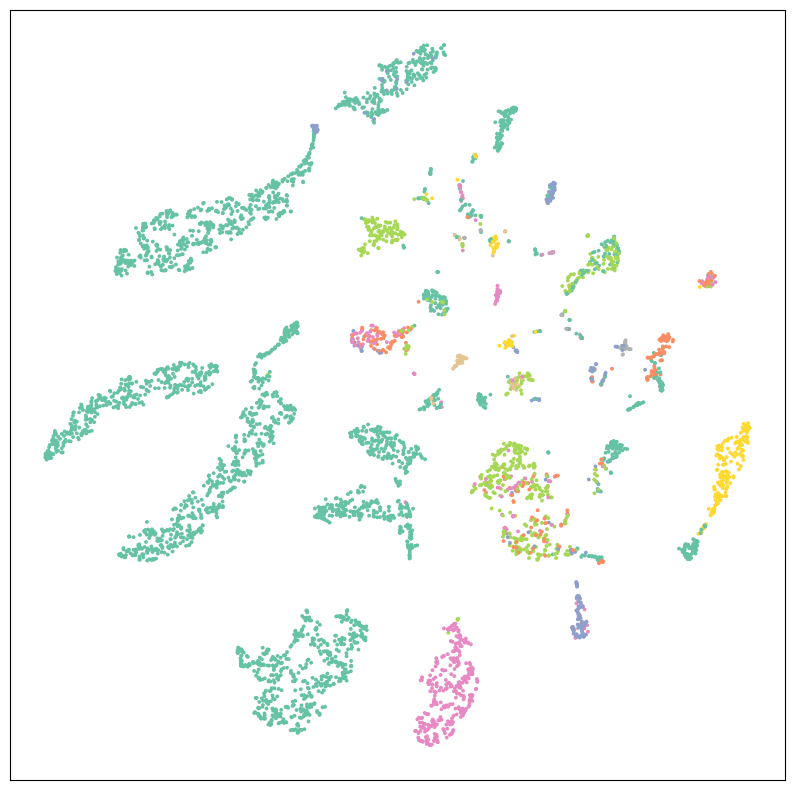

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, recall_score
from torch_geometric.explain import Explainer, CaptumExplainer


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)
disease_names = metadata.disease.unique().tolist()

checkpoint = torch.load('artifacts/GAT.pt', map_location='cpu')
model.load_state_dict(checkpoint['model'])
with torch.no_grad():
    model.eval()
    out = model(test_data.x_dict, test_data.edge_index_dict, edge_attr=test_data.edge_attr_dict)

# Compute overall accuracy
y_true = metadata[metadata.test].disease
y_pred = pd.Categorical.from_codes(out.argmax(dim=1).numpy(), disease_names)
accuracy = accuracy_score(y_true, y_pred)
print(f'\033[1mOverall Accuracy\033[0m : {accuracy:.2f}\t\t\033[1mSupport\033[0m : {len(y_true)}')

# Instantiate Captum explainer and use Integrated Gradients as approximations of the importance of the edges
explainer = Explainer(
    model=model,
    algorithm=CaptumExplainer('IntegratedGradients'),
    explanation_type='phenomenon',
    edge_mask_type='object',
    model_config=dict(mode='multiclass_classification', task_level='node', return_type='raw')
)
subgraph = test_data.subgraph({'sample': test_data['sample'].y != disease_names.index('Healthy control')})
explanation = explainer(
    subgraph.x_dict,
    subgraph.edge_index_dict,
    edge_attr=subgraph.edge_attr_dict,
    target=subgraph['sample'].y,
    index=torch.arange(subgraph['sample'].num_nodes)
)
edge_index = subgraph['mirna', 'rev_to', 'sample'].edge_index
edge_weight = explanation.edge_mask_dict['mirna', 'rev_to', 'sample']

# Evaluate results for each disease
results = {}
for disease, datasets in metadata.groupby('disease').dataset.agg(set).items():
    if disease != 'Healthy control':
    
        # Compute sensitivity: TP/P
        sensitivity = recall_score(y_true == disease, y_pred == disease)

        # Compute  specificity: TN/N. TN are selected only from datasets containing the disease
        sample_mask = metadata[metadata.test].dataset.isin(datasets)
        specificity = recall_score(y_true[sample_mask] == disease, y_pred[sample_mask] == disease, pos_label=False)

        # Compute average importance for each miRNA
        importance = {}
        samples = torch.nonzero(subgraph['sample'].y == disease_names.index(disease)).squeeze()
        edge_mask = torch.isin(edge_index[1], samples)
        for mirna, value in zip(edge_index[0][edge_mask], edge_weight[edge_mask]):
            importance.setdefault(mirna.item(), []).append(value.item())
        importance = {k: np.mean(v) for k, v in importance.items()}

        # Standardize importances and select miRNAs with z-score greater than 2
        mean = np.mean(list(importance.values()))
        std = np.std(list(importance.values()))
        importance = {k: (v - mean) / std for k, v in importance.items()}
        relevant_mirna = {values.columns[k]: round(v, 2) for k, v in importance.items() if v > 2}

        # Sort selected miRNAs by z-score
        relevant_mirna = dict(sorted(relevant_mirna.items(), key=lambda item: item[1], reverse=True))

        results[disease] = {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Informedness': sensitivity + specificity - 1,
            'Support': sum(y_true == disease),
            'Relevant miRNAs': relevant_mirna
        }

# Sort diseases by informedness score
results = pd.DataFrame(results).T.sort_values('Informedness', ascending=False)
results = results.astype({'Sensitivity': float, 'Specificity': float, 'Informedness': float}).round(2)
results.to_csv('results/GAT.csv')

# Compute average scores
averages = pd.DataFrame({
    'Sensitivity': (results.Sensitivity.mean(), sum(results.Sensitivity * results.Support) / sum(results.Support)),
    'Specificity': (results.Specificity.mean(), sum(results.Specificity * results.Support) / sum(results.Support)),
    'Informedness': (results.Informedness.mean(), sum(results.Informedness * results.Support) / sum(results.Support)),
    'Support': (sum(results.Support), sum(results.Support))
}, index=['Macro Avg', 'Weighted Avg']).round(2)

pd.set_option('display.max_rows', 100)
display(results)
display(averages)

# Project sample embeddings in a two-dimensional space
z = TSNE(n_components=2).fit_transform(out.numpy())
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.scatter(z[:,0], z[:,1], s=3, c=test_data['sample'].y, cmap='Set2')
plt.show()

# Bagging Classifier

## Training

In [4]:
import pandas as pd
import joblib
from sklearn.ensemble import BaggingClassifier


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)

X = values.merge(metadata[['dataset', 'technology', 'country', 'city', 'sample_type', 'sex',  'age']], left_index=True, right_index=True)
X = pd.get_dummies(X)
X_train = X[~metadata.test]
y_train = metadata[~metadata.test].disease

model = BaggingClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'artifacts/Bagging.joblib');

## Evaluation

In [12]:
import joblib
import pandas as pd
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.inspection import permutation_importance


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)
model = joblib.load('artifacts/Bagging.joblib')

X = values.merge(metadata[['dataset', 'technology', 'country', 'city', 'sample_type', 'sex',  'age']], left_index=True, right_index=True)
X = pd.get_dummies(X)
X_test = X[metadata.test]

# Compute overall accuracy
y_true = metadata[metadata.test].disease
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f'\033[1mOverall Accuracy\033[0m : {accuracy:.2f}\t\t\033[1mSupport\033[0m : {len(y_true)}')

# Evaluate results for each disease
results = {}
scoring = {}
for disease, datasets in metadata.groupby('disease').dataset.agg(set).items():
    if disease != 'Healthy control':

        # Compute sensitivity: TP/P
        sensitivity = recall_score(y_true == disease, y_pred == disease)
        
        # Compute  specificity: TN/N. TN are selected only from datasets containing the disease
        sample_mask = metadata[metadata.test].dataset.isin(datasets)
        specificity = recall_score(y_true[sample_mask] == disease, y_pred[sample_mask] == disease, pos_label=False)

        results[disease] = {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Informedness': sensitivity + specificity - 1,
            'Support': sum(y_true == disease)
        }

        # Define scoring function for permutation importance based on informedness
        scoring[disease] = make_scorer(lambda yt, yp, d=disease, m=sample_mask:
            recall_score(yt == d, yp == d) + recall_score(yt[m] == d, yp[m] == d, pos_label=False) - 1)

# Permutation feature importance is the decrease in the model score when a single feature value is randomly shuffled
# Compute permutation importance of miRNAs for each disease
importance = permutation_importance(model, X_test, y_true, scoring=scoring, n_repeats=3, random_state=42)
importance = {k: v.importances_mean[:len(values.columns)] for k, v in importance.items()}

# Standardize importance and select miRNAs with z-score greater than 2
importance = {k: zscore(v) for k, v in importance.items()}
for disease, weights in importance.items():
    relevant_mirna = {k: round(v, 2) for k, v in zip(values.columns, weights) if v > 2}

    # Sort selected miRNAs by z-score
    relevant_mirna = dict(sorted(relevant_mirna.items(), key=lambda item: item[1], reverse=True))
    results[disease]['Relevant miRNAs'] = relevant_mirna

# Sort diseases by informedness score
results = pd.DataFrame(results).T.sort_values('Informedness', ascending=False)
results = results.astype({'Sensitivity': float, 'Specificity': float, 'Informedness': float}).round(2)
results.to_csv('results/Bagging.csv')

# Compute average scores
averages = pd.DataFrame({
    'Sensitivity': (results.Sensitivity.mean(), sum(results.Sensitivity * results.Support) / sum(results.Support)),
    'Specificity': (results.Specificity.mean(), sum(results.Specificity * results.Support) / sum(results.Support)),
    'Informedness': (results.Informedness.mean(), sum(results.Informedness * results.Support) / sum(results.Support)),
    'Support': (sum(results.Support), sum(results.Support))
}, index=['Macro Avg', 'Weighted Avg']).round(2)

pd.set_option('display.max_rows', 100)
display(results)
display(averages)

Overall Accuracy : 0.90		Support : 5192


,Sensitivity,Specificity,Informedness,Support,Relevant miRNAs
Oral squamous cell cancer,1.00,1.00,1.00,5,"{'hsa-miR-5100': 44.16, 'hsa-miR-1228-5p': 25.22}"
Lung cancer (post-operation),1.00,1.00,1.00,36,"{'hsa-miR-1228-5p': 44.72, 'hsa-miR-5100': 21...."
Chronic pancreatitis,1.00,1.00,1.00,2,"{'hsa-miR-1228-5p': 30.67, 'hsa-miR-3611': 22...."
Esophageal squamous cell carcinoma,0.97,1.00,0.96,123,"{'hsa-miR-5100': 40.16, 'hsa-miR-1228-5p': 28...."
Lung cancer,0.94,1.00,0.93,360,"{'hsa-miR-5100': 41.46, 'hsa-miR-1228-5p': 29.38}"
Ovarian cancer,0.91,0.96,0.88,81,"{'hsa-miR-5100': 43.26, 'hsa-miR-1228-5p': 26.62}"
Breast cancer,0.89,0.98,0.87,339,"{'hsa-miR-5100': 33.01, 'hsa-miR-1228-5p': 24...."
Wilms tumor (post chemotherapy),1.00,0.86,0.86,6,"{'hsa-miR-1225-5p': 38.72, 'hsa-miR-1228-5p': ..."
Glioma,0.88,0.98,0.85,58,"{'hsa-miR-5100': 46.0, 'hsa-miR-1228-5p': 12.2..."
Prostate cancer,0.97,0.87,0.84,261,"{'hsa-miR-5100': 37.88, 'hsa-miR-1228-5p': 32...."


,Sensitivity,Specificity,Informedness,Support
Macro Avg,0.5,0.87,0.37,2271
Weighted Avg,0.8,0.93,0.72,2271
